In [128]:
import pandas as pd

In [129]:
df_1 = pd.read_csv('messstellen_cleaned.csv')

In [130]:
print(df_1['bundesland'].unique())

['bb' 'be' 'bw' 'by' 'he' 'mv' 'ni' 'nw' 'rp' 'sh' 'sn' 'st' 'th']


In [131]:
df_1.columns

Index(['ms_nr', 'bundesland', 'behoerde', 'kreis', 'bez', 'ags', 'latitude',
       'longitude', 'pct_data_1990_2021', 'breakpoint_drop',
       'trend_normalized', 'trend_bin', 'trend_raw', 'range', 'p_value'],
      dtype='object')

In [132]:



# Create a mapping dictionary
bundesland_mapping = {
    'bw': 'Baden-Württemberg',
    'by': 'Bayern',
    'be': 'Berlin',
    'bb': 'Brandenburg',
    'hb': 'Bremen',
    'hh': 'Hamburg',
    'he': 'Hessen',
    'mv': 'Mecklenburg-Vorpommern',
    'ni': 'Niedersachsen',
    'nw': 'Nordrhein-Westfalen',
    'rp': 'Rheinland-Pfalz',
    'sl': 'Saarland',
    'sn': 'Sachsen',
    'st': 'Sachsen-Anhalt',
    'sh': 'Schleswig-Holstein',
    'th': 'Thüringen'
}

# Convert the short names in df_1 to full names
df_1['bundesland'] = df_1['bundesland'].map(bundesland_mapping)

# Verify the conversion
print(df_1['bundesland'].unique())

['Brandenburg' 'Berlin' 'Baden-Württemberg' 'Bayern' 'Hessen'
 'Mecklenburg-Vorpommern' 'Niedersachsen' 'Nordrhein-Westfalen'
 'Rheinland-Pfalz' 'Schleswig-Holstein' 'Sachsen' 'Sachsen-Anhalt'
 'Thüringen']


In [133]:
df_1

,ms_nr,bundesland,behoerde,kreis,bez,ags,latitude,longitude,pct_data_1990_2021,breakpoint_drop,trend_normalized,trend_bin,trend_raw,range,p_value
0,bb-25500006,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.422495,14.144715,0.997396,NaN,0.497666,kein starker Trend,0.006196,1.2450,0.000000e+00
1,bb-26500002,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.380891,14.145564,0.986979,NaN,0.200351,kein starker Trend,0.004142,2.0675,0.000000e+00
2,bb-27400050,Brandenburg,bb,Ostprignitz-Ruppin,Landkreis,12068.0,53.291135,12.390457,0.992188,NaN,-0.658969,leicht sinkend,-0.009489,1.4400,0.000000e+00
3,bb-27400058,Brandenburg,bb,Ostprignitz-Ruppin,Landkreis,12068.0,53.200665,12.402967,0.986979,NaN,-0.379311,kein starker Trend,-0.005329,1.4050,5.949784e-10
4,bb-27400059,Brandenburg,bb,Ostprignitz-Ruppin,Landkreis,12068.0,53.256544,12.388785,1.000000,NaN,-0.441760,kein starker Trend,-0.003413,0.7725,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,th-208486,Thüringen,th,Sonneberg,Landkreis,16072.0,50.381521,11.012853,1.000000,NaN,-0.008518,kein starker Trend,-0.000331,3.8875,8.043914e-01
6673,th-208491,Thüringen,th,Sonneberg,Landkreis,16072.0,50.388916,11.034987,1.000000,NaN,-0.211891,kein starker Trend,-0.010806,5.1000,3.000000e-16
6674,th-221755,Thüringen,th,Schmalkalden-Meiningen,Landkreis,16066.0,50.576363,10.127140,0.963542,NaN,-0.980481,leicht sinkend,-0.020590,2.1000,0.000000e+00
6675,th-302577,Thüringen,th,Gera,Kreisfreie Stadt,16052.0,50.829880,12.081453,0.979167,NaN,0.083221,kein starker Trend,0.002715,3.2625,1.330454e-03


### time series trend analysis
### pct_data_1990_2021: Percentage of available monthly average values from 1990 to 2021.

### breakpoint_drop: Indicates whether a monitoring station was excluded from the analysis after manual inspection (True if excluded).

### trend_normalized: Normalized trend in groundwater levels, expressed as a percentage per year.

### trend_bin: Trend classification, ranging from "stark sinkend" (strongly decreasing) to "stark steigend" (strongly increasing).

### trend_raw: Raw trend in groundwater levels, expressed in meters per year.

### range: Range of monthly average values in meters.

### p_value: P-value from the trend analysis, indicating the statistical significance of the trend

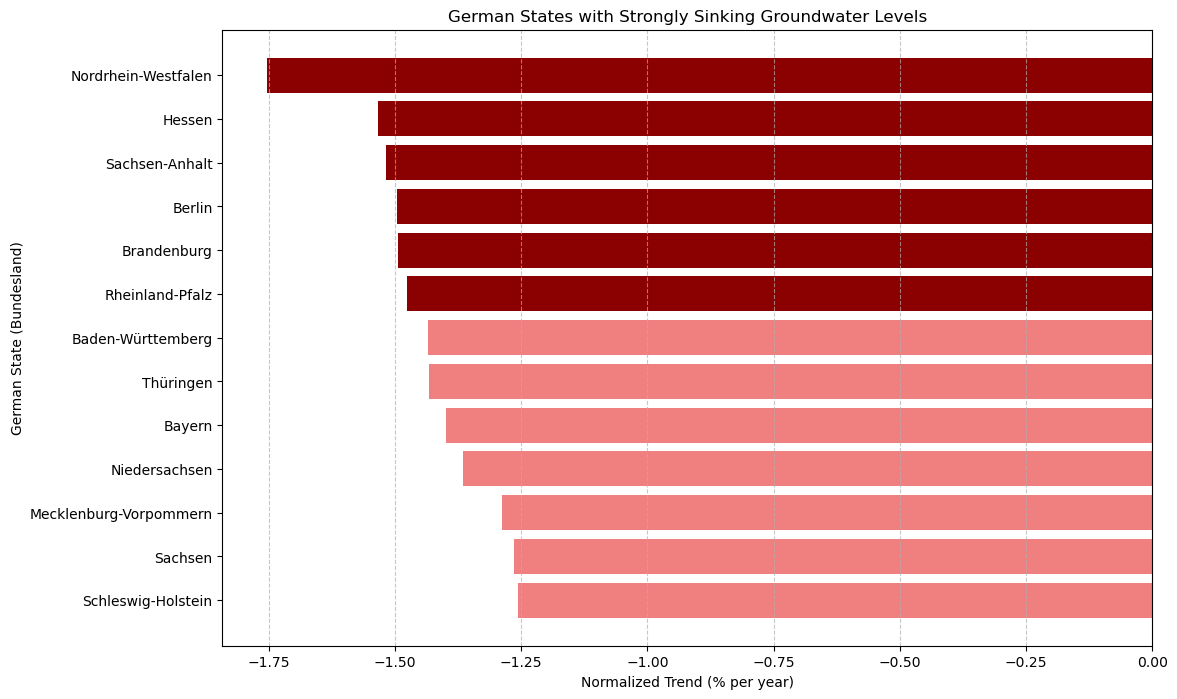

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for strongly sinking groundwater trends
strongly_sinking = df_1[df_1['trend_bin'] == 'stark sinkend']

# Group by 'bundesland' and calculate the mean trend_normalized for each state
state_trends = strongly_sinking.groupby('bundesland')['trend_normalized'].mean().reset_index()

# Sort the states in descending order based on trend_normalized
sorted_states = state_trends.sort_values(by='trend_normalized', ascending=True).head(16)

# Define colors for the bars
colors = ['darkred'] * 6 + ['lightcoral'] * (len(sorted_states) - 6)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_states['bundesland'], sorted_states['trend_normalized'], color=colors)
plt.xlabel('Normalized Trend (% per year)')
plt.ylabel('German State (Bundesland)')
plt.title('German States with Strongly Sinking Groundwater Levels')
plt.gca().invert_yaxis()  # To display the state with the most negative trend at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [163]:
df_1['trend_normalized'].max()

3.83960449837945

In [88]:
df_2 = pd.read_csv('avg_temperature_per_year_bundesland.csv')

In [89]:
df_2

,bundesland,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Baden-Württemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berlin,12.771951,12.771951,12.771951,12.771951,12.771951,12.771951,12.771951,11.374247,11.234699,9.890685
2,Brandenburg,9.760656,9.500822,11.029315,10.641644,10.405738,10.373425,11.400822,11.479726,11.403005,10.055342
3,Bremen,9.684426,9.338082,11.057534,10.403014,10.136339,10.131233,11.113699,10.953699,11.147541,9.893425
4,Hamburg,9.365574,9.195890,10.829315,10.137808,9.922404,9.910411,10.742192,10.669589,10.823224,9.779178
5,Hessen,8.693716,8.171781,9.955342,9.567671,9.059016,9.192603,10.194247,9.845753,10.119945,8.658630
6,Mecklenburg-Vorpommern,9.065027,8.998356,10.269315,9.976712,9.730601,9.580000,10.549863,10.766575,10.623224,9.616986
7,Niedersachsen,9.920879,9.920879,9.920879,9.920879,9.920879,9.920879,9.920879,9.920879,9.920879,9.920879
8,Nordrhein-Westfalen,-1.200000,-1.200000,14.250000,12.785714,16.950000,3.897059,11.592795,11.373699,11.707104,10.439726
9,Rheinland-Pfalz,11.848171,11.848171,11.848171,11.848171,11.848171,11.848171,11.848171,10.732329,11.478415,9.854521


In [90]:
df_tief = pd.read_csv('tiefststaende_nach_kreis.csv')

In [91]:
# Select columns for the years 2012-2021 and other relevant columns
columns_to_keep = ['bundesland', 'kreis', 'bez', 'ags', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'messstellen_insgesamt']

df_3 = df_tief[columns_to_keep]

# Display the first few rows of the filtered DataFrame
df_3

,bundesland,kreis,bez,ags,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,messstellen_insgesamt
0,Baden-Württemberg,Alb-Donau-Kreis,Landkreis,8425,2.0,0.0,1.0,0.0,1.0,0.0,9.0,1.0,11.0,4.0,68
1,Baden-Württemberg,Baden-Baden,Stadtkreis,8211,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4
2,Baden-Württemberg,Biberach,Landkreis,8426,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0,9.0,0.0,123
3,Baden-Württemberg,Bodenseekreis,Landkreis,8435,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,2.0,17
4,Baden-Württemberg,Breisgau-Hochschwarzwald,Landkreis,8315,0.0,0.0,1.0,0.0,0.0,0.0,7.0,3.0,7.0,3.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Thüringen,Sömmerda,Landkreis,16068,1.0,0.0,0.0,0.0,2.0,0.0,1.0,9.0,5.0,2.0,25
296,Thüringen,Unstrut-Hainich-Kreis,Landkreis,16064,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,12
297,Thüringen,Wartburgkreis,Landkreis,16063,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,9.0,0.0,32
298,Thüringen,Weimar,Kreisfreie Stadt,16055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [92]:
# Join df_1 with df_3 on common columns 'bundesland', 'kreis', 'bez', 'ags'
df_1_3 = pd.merge(df_1, df_3, on=['bundesland', 'kreis', 'bez', 'ags'], how='inner')

# Join the result with df_2 on 'bundesland' (which is the common column)
df_final = pd.merge(df_1_3, df_2, on='bundesland', how='inner')



print(df_final.head())
print(df_final.shape)

         ms_nr   bundesland behoerde      kreis        bez      ags  \
0  bb-25500006  Brandenburg       bb  Uckermark  Landkreis  12073.0   
1  bb-26500002  Brandenburg       bb  Uckermark  Landkreis  12073.0   
2  bb-27452330  Brandenburg       bb  Uckermark  Landkreis  12073.0   
3  bb-27460295  Brandenburg       bb  Uckermark  Landkreis  12073.0   
4  bb-27511009  Brandenburg       bb  Uckermark  Landkreis  12073.0   

    latitude  longitude  pct_data_1990_2021  breakpoint_drop  ...    2012_y  \
0  53.422495  14.144715            0.997396              NaN  ...  9.760656   
1  53.380891  14.145564            0.986979              NaN  ...  9.760656   
2  53.218252  13.318076            1.000000              NaN  ...  9.760656   
3  53.232986  13.381642            1.000000              NaN  ...  9.760656   
4  53.215186  14.208529            0.986979              NaN  ...  9.760656   

     2013_y     2014_y     2015_y     2016_y     2017_y     2018_y     2019_y  \
0  9.500822  11.0

In [93]:
df_final

,ms_nr,bundesland,behoerde,kreis,bez,ags,latitude,longitude,pct_data_1990_2021,breakpoint_drop,...,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y
0,bb-25500006,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.422495,14.144715,0.997396,NaN,...,9.760656,9.500822,11.029315,10.641644,10.405738,10.373425,11.400822,11.479726,11.403005,10.055342
1,bb-26500002,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.380891,14.145564,0.986979,NaN,...,9.760656,9.500822,11.029315,10.641644,10.405738,10.373425,11.400822,11.479726,11.403005,10.055342
2,bb-27452330,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.218252,13.318076,1.000000,NaN,...,9.760656,9.500822,11.029315,10.641644,10.405738,10.373425,11.400822,11.479726,11.403005,10.055342
3,bb-27460295,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.232986,13.381642,1.000000,NaN,...,9.760656,9.500822,11.029315,10.641644,10.405738,10.373425,11.400822,11.479726,11.403005,10.055342
4,bb-27511009,Brandenburg,bb,Uckermark,Landkreis,12073.0,53.215186,14.208529,0.986979,NaN,...,9.760656,9.500822,11.029315,10.641644,10.405738,10.373425,11.400822,11.479726,11.403005,10.055342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6184,th-133259,Thüringen,th,Saale-Orla-Kreis,Landkreis,16075.0,50.643127,11.817543,0.992188,NaN,...,9.006284,8.391781,10.044110,9.882740,9.352459,9.483288,10.381644,10.263836,10.321311,8.863562
6185,th-133261,Thüringen,th,Saale-Orla-Kreis,Landkreis,16075.0,50.680448,11.642515,1.000000,NaN,...,9.006284,8.391781,10.044110,9.882740,9.352459,9.483288,10.381644,10.263836,10.321311,8.863562
6186,th-133302,Thüringen,th,Saale-Orla-Kreis,Landkreis,16075.0,50.420807,11.639337,1.000000,NaN,...,9.006284,8.391781,10.044110,9.882740,9.352459,9.483288,10.381644,10.263836,10.321311,8.863562
6187,th-132382,Thüringen,th,Jena,Kreisfreie Stadt,16053.0,50.912105,11.584825,0.971354,NaN,...,9.006284,8.391781,10.044110,9.882740,9.352459,9.483288,10.381644,10.263836,10.321311,8.863562


In [156]:
df_final.columns

Index(['ms_nr', 'bundesland', 'behoerde', 'kreis', 'bez', 'ags', 'latitude',
       'longitude', 'pct_data_1990_2021', 'trend_normalized', 'trend_bin',
       'trend_raw', 'range', 'p_value', '2012_x', '2013_x', '2014_x', '2015_x',
       '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x',
       'messstellen_insgesamt', '2012_y', '2013_y', '2014_y', '2015_y',
       '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y',
       '2012_y_binned', '2013_y_binned', '2014_y_binned', '2015_y_binned',
       '2016_y_binned', '2017_y_binned', '2018_y_binned', '2019_y_binned',
       '2020_y_binned', '2021_y_binned'],
      dtype='object')

In [95]:
df_final.isnull().sum()

ms_nr                       0
bundesland                  0
behoerde                    0
kreis                       0
bez                         0
ags                         0
latitude                    0
longitude                   0
pct_data_1990_2021          0
breakpoint_drop          6189
trend_normalized            0
trend_bin                   0
trend_raw                   0
range                       0
p_value                     0
2012_x                      0
2013_x                      0
2014_x                      0
2015_x                      0
2016_x                      0
2017_x                      0
2018_x                      0
2019_x                      0
2020_x                      0
2021_x                      0
messstellen_insgesamt       0
2012_y                   1077
2013_y                   1077
2014_y                   1077
2015_y                   1077
2016_y                   1077
2017_y                   1077
2018_y                   1077
2019_y    

In [96]:
df_final.drop(columns=['breakpoint_drop'], inplace=True)


In [97]:
df_final.columns

Index(['ms_nr', 'bundesland', 'behoerde', 'kreis', 'bez', 'ags', 'latitude',
       'longitude', 'pct_data_1990_2021', 'trend_normalized', 'trend_bin',
       'trend_raw', 'range', 'p_value', '2012_x', '2013_x', '2014_x', '2015_x',
       '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x',
       'messstellen_insgesamt', '2012_y', '2013_y', '2014_y', '2015_y',
       '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y'],
      dtype='object')

In [107]:
df_final['2012_y'].unique()

array([ 9.76065574, 12.77195122, 12.76816807, ...,  9.34371585,
        9.79863388,  9.00628415])

In [98]:
import pandas as pd

# Assuming df_final is already created and cleaned except for the missing values
weather_columns = ['2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y']

# Check for missing values before interpolation
print("Missing values before interpolation:")
print(df_final[weather_columns].isnull().sum())

# Interpolate missing values using linear interpolation
df_final[weather_columns] = df_final[weather_columns].interpolate(method='linear', axis=0)

# Forward fill any remaining missing values
df_final[weather_columns] = df_final[weather_columns].ffill(axis=0)

# Backward fill any remaining missing values
df_final[weather_columns] = df_final[weather_columns].bfill(axis=0)

# Check for remaining missing values after interpolation
print("Missing values after interpolation and forward/backward fill:")
print(df_final[weather_columns].isnull().sum())

# Display the first few rows of the dataframe to verify
print(df_final.head())

Missing values before interpolation:
2012_y    1077
2013_y    1077
2014_y    1077
2015_y    1077
2016_y    1077
2017_y    1077
2018_y    1077
2019_y    1077
2020_y    1077
2021_y    1077
dtype: int64
Missing values after interpolation and forward/backward fill:
2012_y    0
2013_y    0
2014_y    0
2015_y    0
2016_y    0
2017_y    0
2018_y    0
2019_y    0
2020_y    0
2021_y    0
dtype: int64
         ms_nr   bundesland behoerde      kreis        bez      ags  \
0  bb-25500006  Brandenburg       bb  Uckermark  Landkreis  12073.0   
1  bb-26500002  Brandenburg       bb  Uckermark  Landkreis  12073.0   
2  bb-27452330  Brandenburg       bb  Uckermark  Landkreis  12073.0   
3  bb-27460295  Brandenburg       bb  Uckermark  Landkreis  12073.0   
4  bb-27511009  Brandenburg       bb  Uckermark  Landkreis  12073.0   

    latitude  longitude  pct_data_1990_2021  trend_normalized  ...    2012_y  \
0  53.422495  14.144715            0.997396          0.497666  ...  9.760656   
1  53.380891  14.1

In [99]:
df_final.isnull().sum()

ms_nr                    0
bundesland               0
behoerde                 0
kreis                    0
bez                      0
ags                      0
latitude                 0
longitude                0
pct_data_1990_2021       0
trend_normalized         0
trend_bin                0
trend_raw                0
range                    0
p_value                  0
2012_x                   0
2013_x                   0
2014_x                   0
2015_x                   0
2016_x                   0
2017_x                   0
2018_x                   0
2019_x                   0
2020_x                   0
2021_x                   0
messstellen_insgesamt    0
2012_y                   0
2013_y                   0
2014_y                   0
2015_y                   0
2016_y                   0
2017_y                   0
2018_y                   0
2019_y                   0
2020_y                   0
2021_y                   0
dtype: int64

In [100]:
df_final.to_csv('final_df_for_tab.csv' , index=False)

In [101]:
#	•	Null Hypothesis (H0): There is no correlation between groundwater levels and weather conditions.
#	•	Alternative Hypothesis (H1): There is a correlation between groundwater levels and weather conditions.
# using the Pearson correlation coefficient?
# 	•	Groundwater Measurement (2012_x): Discrete data (not binary)
#	•	Average Weather (2012_y): Continuous data

In [110]:
#Spearman Rank Correlation

import pandas as pd
from scipy.stats import spearmanr


# Columns for groundwater measurement values (discrete)
groundwater_columns = ['2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x']

# Columns for weather data (continuous, average temperature)
weather_columns = ['2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y']

# Calculate the Spearman rank correlation coefficient for each year
correlation_results = {}
for year in range(2012, 2022):
    groundwater_col = f'{year}_x'
    weather_col = f'{year}_y'
    corr, p_value = spearmanr(df_final[groundwater_col], df_final[weather_col])
    correlation_results[year] = {'correlation': corr, 'p_value': p_value}

# Display the correlation results
correlation_df = pd.DataFrame(correlation_results).T
print(correlation_df)

      correlation        p_value
2012     0.240869   2.111151e-82
2013     0.026375   3.799992e-02
2014    -0.220164   8.114196e-69
2015     0.145633   1.094815e-30
2016     0.402108  2.831027e-239
2017     0.475684   0.000000e+00
2018     0.010186   4.230115e-01
2019     0.177725   4.305250e-45
2020     0.326591  9.104571e-154
2021     0.331221  2.318573e-158


In [111]:
# chi-test
# 	1.	Categorize Continuous Data: Convert the continuous weather data into categorical data by binning.
#	2.	Create a Contingency Table: Summarize the data into a contingency table.

In [115]:

#	•	If p-value < 0.05: There is a significant association between groundwater measurements and weather data categories.
#	•	If p-value >= 0.05: There is no significant association between groundwater measurements and weather data categories.

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming df_final is already created and loaded

# Step 1: Categorize Continuous Data
bins = [0, 10, 20, 30]  # Adjust bins based on your data range
labels = ['low', 'medium', 'high']

for year in range(2012, 2022):
    col = f'{year}_y'
    df_final[f'{year}_y_binned'] = pd.cut(df_final[col], bins=bins, labels=labels, include_lowest=True)

# Step 2: Create a Contingency Table for each year
for year in range(2012, 2022):
    groundwater_col = f'{year}_x'
    weather_binned_col = f'{year}_y_binned'
    
    # Create the contingency table
    contingency_table = pd.crosstab(df_final[groundwater_col], df_final[weather_binned_col])
    print(f"Contingency Table for {year}:")
    print(contingency_table)
    
    # Step 3: Perform the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Step 4: Interpret the Results
    print(f"\nResults for {year}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    print("\n")
    
    # Interpret the p-value
    if p < 0.05:
        print(f"There is a significant association between groundwater measurements and weather data categories for {year}.")
    else:
        print(f"There is no significant association between groundwater measurements and weather data categories for {year}.")
    print("\n" + "-"*50 + "\n")

Contingency Table for 2012:
2012_y_binned   low  medium
2012_x                     
0.0            3865     805
1.0             349     695
2.0             100      90
4.0              46       0

Results for 2012:
Chi-Square Statistic: 1119.2704875636648
P-Value: 2.400473034722764e-242
Degrees of Freedom: 3
Expected Frequencies:
[[3422.05042017 1247.94957983]
 [ 765.01512605  278.98487395]
 [ 139.22689076   50.77310924]
 [  33.70756303   12.29243697]]


There is a significant association between groundwater measurements and weather data categories for 2012.

--------------------------------------------------

Contingency Table for 2013:
2013_y_binned   low  medium
2013_x                     
0.0            3974    1473
1.0             368      34
2.0              13       0
4.0              88       0

Results for 2013:
Chi-Square Statistic: 103.21794114392108
P-Value: 3.158454059787415e-22
Degrees of Freedom: 3
Expected Frequencies:
[[4.06739849e+03 1.37960151e+03]
 [3.00182521e+02 1

In [118]:
df_final.columns

Index(['ms_nr', 'bundesland', 'behoerde', 'kreis', 'bez', 'ags', 'latitude',
       'longitude', 'pct_data_1990_2021', 'trend_normalized', 'trend_bin',
       'trend_raw', 'range', 'p_value', '2012_x', '2013_x', '2014_x', '2015_x',
       '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x',
       'messstellen_insgesamt', '2012_y', '2013_y', '2014_y', '2015_y',
       '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y',
       '2012_y_binned', '2013_y_binned', '2014_y_binned', '2015_y_binned',
       '2016_y_binned', '2017_y_binned', '2018_y_binned', '2019_y_binned',
       '2020_y_binned', '2021_y_binned'],
      dtype='object')

In [124]:
df_final.to_csv('final_df_for_tab-withbin.csv' , index=False)

In [145]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming df_final is already created and loaded

# Step 1: Categorize Continuous Data
bins = [0, 10, 20, 30]  # Adjust bins based on your data range
labels = ['low', 'medium', 'high']

for year in range(2012, 2022):
    col = f'{year}_y'
    df_final[f'{year}_y_binned'] = pd.cut(df_final[col], bins=bins, labels=labels, include_lowest=True)

# Step 2: Create a Contingency Table for each year and perform the Chi-Square Test
for year in range(2012, 2022):
    groundwater_col = f'{year}_x'
    weather_binned_col = f'{year}_y_binned'
    
    # Create the contingency table
    contingency_table = pd.crosstab(df_final[groundwater_col], df_final[weather_binned_col])
    
    # Step 3: Perform the Chi-Square Test
    _, p, _, _ = chi2_contingency(contingency_table)
    
    # Step 4: Print the P-Value
    print(f"P-Value for {year}: {p}")

P-Value for 2012: 2.400473034722764e-242
P-Value for 2013: 3.158454059787415e-22
P-Value for 2014: 5.466699333013054e-194
P-Value for 2015: 1.9950973835562846e-40
P-Value for 2016: 3.787189604913921e-179
P-Value for 2017: 1.2702353681431136e-235
P-Value for 2018: 0.0
P-Value for 2019: 0.0
P-Value for 2020: 0.0
P-Value for 2021: 0.0


### Pearson Correlation FINAL

### which measures the linear relationship between two continuous variables

Year 2012:
Pearson Correlation Coefficient: 0.12971875202879343
P-Value: 1.2301670003953748e-24

--------------------------------------------------

Year 2013:
Pearson Correlation Coefficient: -0.022405147273991892
P-Value: 0.07798780104747954

--------------------------------------------------

Year 2014:
Pearson Correlation Coefficient: -0.20818437688571673
P-Value: 1.4416201069314682e-61

--------------------------------------------------

Year 2015:
Pearson Correlation Coefficient: 0.041581059943719106
P-Value: 0.0010681055053322816

--------------------------------------------------

Year 2016:
Pearson Correlation Coefficient: 0.25108063746493725
P-Value: 1.325169283694831e-89

--------------------------------------------------

Year 2017:
Pearson Correlation Coefficient: 0.4168318690261138
P-Value: 9.37925638300372e-259

--------------------------------------------------

Year 2018:
Pearson Correlation Coefficient: -0.024514801903775942
P-Value: 0.053794883614120756

------------

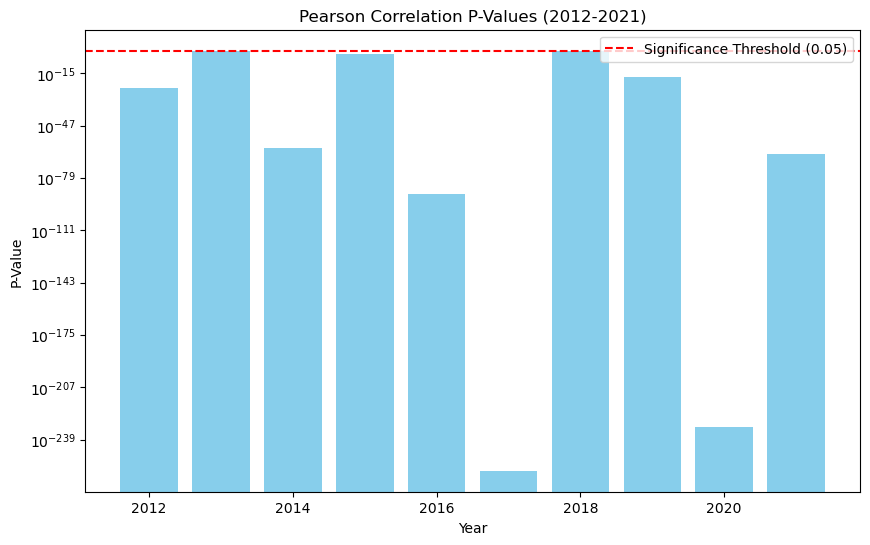

In [155]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Pearson Correlation

# List to store p-values for each year
pearson_p_values = []

for year in range(2012, 2022):
    groundwater_col = f'{year}_x'
    weather_col = f'{year}_y'
    
    # Groundwater data (continuous)
    groundwater_data = df_final[groundwater_col]
    
    # Average temperature data (continuous)
    weather_data = df_final[weather_col]
    
    # Pearson Correlation
    corr, p_value = pearsonr(groundwater_data, weather_data)
    pearson_p_values.append(p_value)
    
    print(f"Year {year}:")
    print(f"Pearson Correlation Coefficient: {corr}")
    print(f"P-Value: {p_value}")
    print("\n" + "-"*50 + "\n")

# Visualization
years = list(range(2012, 2022))

plt.figure(figsize=(10, 6))
plt.bar(years, pearson_p_values, color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Year')
plt.ylabel('P-Value')
plt.title('Pearson Correlation P-Values (2012-2021)')
plt.legend()
plt.yscale('log')  # Use log scale if p-values are extremely small
plt.show()